# Data Analytics-Assignment-Python

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
#importing datasets 
inventory_data= pd.read_excel('Inventory_Dataset.xlsx')
new_inventory_data = pd.read_excel('New_Inventory.xlsx')

In [3]:
inventory_data

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
351,064-18-9909,2023-06-17,12
352,064-18-9962,2023-06-17,19
353,064-18-0790,2023-06-17,5
354,064-18-3316,2023-06-17,7354


In [4]:
new_inventory_data

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [5]:
# Merge the two datasets
df = inventory_data.merge(new_inventory_data, on='Item Number', how='left')
df

,Item Number,Date,Inventory,Inventory Receive,Total Item Qty
0,064-01-1347,2023-06-17,3561,2023-07-10,2000.0
1,064-01-1347,2023-06-17,3561,2023-07-07,1000.0
2,064-01-1347,2023-06-17,3561,2023-07-09,3568.0
3,064-01-1347,2023-06-17,3561,2023-08-04,1800.0
4,064-01-1361,2023-06-17,4035,2023-07-10,2000.0
...,...,...,...,...,...
1121,064-18-3316,2023-06-17,7354,2023-10-13,1380.0
1122,064-18-3316,2023-06-17,7354,2023-09-29,1380.0
1123,064-18-3316,2023-06-17,7354,2023-09-08,500.0
1124,064-18-9667,2023-06-17,7029,2023-10-13,992.0


In [6]:
# Calculate the inventory levels at different dates in the future on a weekly basis
future_dates = pd.date_range(start=df['Date'].max() + pd.DateOffset(days=7), periods=10, freq='W')

In [7]:
future_dates 

DatetimeIndex(['2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16',
               '2023-07-23', '2023-07-30', '2023-08-06', '2023-08-13',
               '2023-08-20', '2023-08-27'],
              dtype='datetime64[ns]', freq='W-SUN')

In [8]:
# Create a dictionary to store the inventory levels for each item
inventory_levels = {}
for item in df['Item Number'].unique():
    inventory_levels[item] = []

In [9]:
for date in future_dates:
    for item in df['Item Number'].unique():
        inventory = df[(df['Item Number'] == item) & (df['Date'] <= date)]['Inventory'].max()
        new_inventory = df[(df['Item Number'] == item) & (df['Inventory Receive'] <= date)]['Total Item Qty'].sum()
        inventory_levels[item].append(inventory + new_inventory)

In [10]:
future_inventory_df = pd.DataFrame(inventory_levels)

In [11]:
future_inventory_df.index = future_dates

In [12]:
future_inventory_df = future_inventory_df.T

In [13]:
future_inventory_df.reset_index(inplace=True)
future_inventory_df.rename(columns={'index': 'Item Number'}, inplace=True)

In [14]:
# Print the DataFrame
future_inventory_df.head()

,Item Number,2023-06-25 00:00:00,2023-07-02 00:00:00,2023-07-09 00:00:00,2023-07-16 00:00:00,2023-07-23 00:00:00,2023-07-30 00:00:00,2023-08-06 00:00:00,2023-08-13 00:00:00,2023-08-20 00:00:00,2023-08-27 00:00:00
0,064-01-1347,3561.0,3561.0,8129.0,10129.0,10129.0,10129.0,11929.0,11929.0,11929.0,11929.0
1,064-01-1361,4035.0,4035.0,9279.0,11279.0,11279.0,11279.0,13479.0,13479.0,13479.0,13479.0
2,064-01-1375,2684.0,2684.0,6032.0,6032.0,6032.0,6032.0,6032.0,6032.0,9432.0,9432.0
3,064-01-1385,5136.0,5136.0,9028.0,11028.0,11028.0,11028.0,13228.0,13228.0,13228.0,13228.0
4,064-01-1399,6399.0,6399.0,13035.0,15435.0,15435.0,15435.0,17435.0,17435.0,17435.0,17435.0


In [15]:
future_inventory_df.shape

(356, 11)

In [16]:
# Calculate the total monthly inventory levels
monthly_inventory_df = df.groupby(['Date'])['Inventory'].sum()
monthly_inventory_df

Date
2023-06-17    8291453
Name: Inventory, dtype: int64

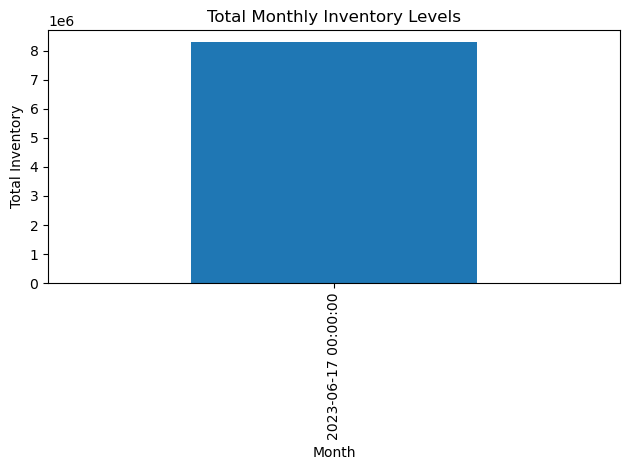

In [19]:

# Create a bar chart showing total monthly inventory levels
monthly_inventory_df.plot(kind='bar')
# Customize the plot
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()